In this Final FDC105 Project, we will try to identify incredible customers based on their financial transactions and
debt classification group. As part of the requirements, students have to decide “Which
group of debts are incredible” by themselves, as long as it helps to distinguish between
credible and incredible customers.

In [1]:
import numpy as np
np.seterr(divide='ignore')
import math
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data_clean = data[['local_ref_1', 'vn_marital_status', 'resid_province', 'birth_incorp_date' , 'nhomno_xhtdJuin2021', 'balanceJuin2021', 'loaikyhanJuin2021','totalSavings2021_heoSo']]

In [4]:
print(data_clean.shape)
data_clean.head(10)

(100000, 8)


,local_ref_1,vn_marital_status,resid_province,birth_incorp_date,nhomno_xhtdJuin2021,balanceJuin2021,loaikyhanJuin2021,totalSavings2021_heoSo
0,MALE,Married,27.0,1992.0,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,1986.0,1.0,0.003666,DH,NaN
2,MALE,Married,1.0,1980.0,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,2001.0,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,1989.0,NaN,NaN,NaN,NaN
5,MALE,Single,37.0,1993.0,NaN,NaN,NaN,NaN
6,MALE,Single,1.0,1994.0,NaN,NaN,NaN,NaN
7,MALE,Married,38.0,1992.0,1.0,0.000139,NH,NaN
8,MALE,Married,40.0,1989.0,NaN,NaN,NaN,NaN
9,FEMALE,Single,1.0,2000.0,NaN,NaN,NaN,NaN


In [5]:
data_clean.describe()

,resid_province,birth_incorp_date,nhomno_xhtdJuin2021,balanceJuin2021,totalSavings2021_heoSo
count,93431.000000,99990.000000,29956.000000,29956.000000,7592.000000
mean,32.143379,1988.480668,1.780111,0.003399,0.016666
std,29.360372,9.474698,1.033548,0.016369,0.021570
min,0.000000,1073.000000,1.000000,0.000000,0.010638
25%,1.000000,1983.000000,1.000000,0.000000,0.010638
50%,30.000000,1990.000000,1.000000,0.000029,0.010638
75%,51.000000,1995.000000,2.000000,0.001500,0.010638
max,96.000000,2020.000000,5.000000,1.000000,1.000000


<AxesSubplot:>

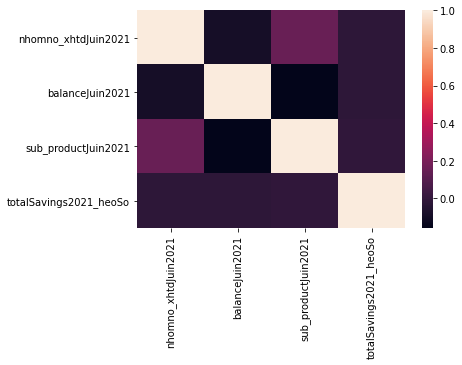

In [6]:
sns.heatmap(data[['nhomno_xhtdJuin2021', 'balanceJuin2021', 'loaikyhanJuin2021', 'sub_productJuin2021','totalSavings2021_heoSo']].corr())

In [7]:
# Replace the categorical values with the numeric equivalents that we have above
categoricalFeatures = ['local_ref_1', 'vn_marital_status', 'resid_province', 'birth_incorp_date', 'nhomno_xhtdJuin2021', 'balanceJuin2021', 'loaikyhanJuin2021']

# Iterate through the list of categorical features and one hot encode them.
for feature in categoricalFeatures:
    onehot = pd.get_dummies(data[feature], prefix=feature)
    data_clean = data_clean.drop(feature, axis=1)
    data_clean = data_clean.join(onehot)

In [8]:
# Liblinear is a solver that is effective for datasets.
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

In [ ]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data_clean)
# We will follow an 80-20 split pattern for our training and test data
X_train,X_test,y_train,y_test = train_test_split(data_clean, y, test_size=0.2, random_state = 0)


In [ ]:
lr.fit(X_train, y_train)

In [ ]:
# We will compare this vector of predictions to the actual target vector to determine the model performance.
y_pred = lr.predict(X_test)

# Build the confusion matrix.
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Print out our performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='Y'))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='Y'))

In [ ]:
print("F1 Score:",metrics.f1_score(y_test, y_pred, pos_label='Y'))